# Political Disinformation Detection: Combating Foreign Interference through Automated Text Classification

Student number: 210323041 

# 1. Introduction

## 1.1 Background

Interference by foreign states in the domestic politics of other countries is nothing new. As early as the 5th century BC. Persia sought to influence Greek state politics by bribing Greek politicians and supporting Greek adversaries (Wikipedia). However, in the age of the Internet and almost instant and unlimited access to information, this problem affects not only politicians, but also ordinary people.

Distinguishing between true or false (fake-news) information is becoming an almost impossible task for the average Internet user. This fact is increasingly exploited by foreign countries that have an interest in influencing public sentiment and even the election results of other countries.

Foreign countries, including Russia, are spreading fake news to interfere in European elections and support far-right parties. This harms democracy across Europe by undermining public trust in elections and democratic institutions (Kalniete).

The threat has grown. Russia has recruited European Parliament members as “influence agents,” funded far-right groups, and run disinformation campaigns across European societies (Trellevik and Cieśla). In 2024, German police arrested a politician’s aide for spying for China and passing on information from the European Parliament (Soula and Avgoustidis).

During the 2024 European Parliament elections, fake news flooded the continent as 373 million voters cast their votes. The EU had to set up special agencies to combat disinformation, particularly from Russia (Kottasová). Researchers identified 193 fake websites spreading lies about Ukraine, while in Germany, police found a Russian campaign using 50,000 fake accounts 

There are significant technical challenges to solving this problem. Identifying political disinformation requires sophisticated methods to distinguish genuine political debate from fake content designed to mislead voters. Foreign actors use artificial intelligence and deepfakes to produce realistic, deceptive content, exploiting existing divisions on issues such as climate change, immigration, and European integration.

Automated text classification is a promising technique for identifying political fake news at scale. However, detection systems must be able to distinguish between ordinary political debate and deliberate disinformation campaigns, adapt to changing adversary tactics, and maintain high accuracy to avoid suppressing legitimate political speech. This project connects European security concerns with natural language processing techniques to explore the most effective automated solutions for defending democratic elections from foreign influence campaigns.

## 1.2 Objectives

### Goals

The first goal is to examine the effectiveness of Naive Bayes and Support Vector Machines in detecting political disinformation. Traditional statistical methods will be tested on European political disinformation data and compared with benchmark datasets. The metrics for the accuracy of the models will be precision, recall, and F1-score. The results will be compared with previous studies.

The second goal is to examine the effectiveness of embedding-based models in the same task. This will involve focusing on BERT-based methods and word embedding models. This will involve a comparison of their ability to capture the meaning of the content and their effectiveness in detecting disinformation campaigns against European democracies. The research will examine traditional word embeddings and modern transformer-based models.

The third goal is to compare the two approaches (statistical and embedding-based) and identify any differences in their accuracy. This will include analyzing which method works better for different types of political content, such as pro-Kremlin disinformation and domestic political statements, and assessing the effectiveness of each in different characteristics of the dataset.

### Applications

This research aims to provide practical recommendations for European election monitoring agencies based on empirical evaluation of existing detection methods. The results will help practitioners choose the best automated methods for political disinformation detection. The project will address the trade-offs between traditional statistical methods and modern embedding-based approaches for monitoring European political disinformation campaigns.

### Expected Contributions

This project will offer evidence-based guidance for protecting European democracy by evaluating the most effective automated methods for detecting political disinformation. The results will help EU agencies improve their election monitoring capabilities and detect foreign influence campaigns targeting European political processes. The research will contribute to understanding the trade-offs between statistical and embedding-based approaches for political fake news detection and their strengths and weaknesses for this critical security task.

## 1.3 Datasets

This project utilizes two complementary datasets to evaluate multilingual fake news detection approaches. The dataset selection ensures high-quality professional fact-checking standards suitable for European election monitoring applications.

### Primary Dataset: EUvsDisinfo [^1]

The primary dataset used in this project is the EUvsDisinfo dataset, containing 14,497 disinformation cases documented between January 2015 and November 2022\. The dataset was originally compiled by the European External Action Service's East StratCom Task Force, documenting professional fact-checking of pro-Kremlin disinformation campaigns targeting European Union member states. The disinformation cases originate from 42 countries and target a range of European nations, and are all in English for analysis. Each case contains the original disinformation, a factual correction, the targeted countries, and the publication outlets, providing a comprehensive data set for binary classification tasks (disinformation vs. reliable). The EUvsDisinfo dataset is centered around European politics, and thus is directly applicable to disinformation patterns affecting European democracies.

### Baseline Comparison: LIAR Dataset [^2]

To compare baseline performance and validate methods, the project uses the LIAR dataset, containing 12.8K manually labeled short statements from PolitiFact.com over a period of ten years. Each statement was verified by PolitiFact editors as true or false, using six labels (true, mostly-true, half-true, barely-true, false, pants-fire). The well-established benchmark dataset contains metadata for speakers and contexts, allowing for a more complete evaluation of statistical and embedding-based methods on standardized political content. The LIAR dataset is used as a baseline for comparison to existing work.

### Data Characteristics and Methodology

The combined datasets provide both binary and multi-class classification labels for political statements and disinformation cases. The EUvsDisinfo dataset contributes substantial political disinformation content focusing on European politics, while LIAR provides a standard benchmark for methodological comparison. Data acquisition was conducted through professional fact-checking verification by European Union experts and journalistic analysis by PolitiFact editors. The combination of authentic political content and reliable ground truth makes the datasets applicable to automated detection systems for election monitoring purposes.

## 1.4 Evaluation Methodology

This project uses a clear and thorough method to compare how well statistical and embedding-based models detect political disinformation. The goal is to compare them and see how well they might work in real-world situations.

### Performance Metrics

Models will be evaluated using standard metrics for binary classification.

* **Precision** measures how many of the detected disinformation cases are actually correct.  
* **Recall** measures how many real disinformation cases the model correctly finds.  
* **F1-score** combines both precision and recall and will be the primary metric we use (given that the dataset might be unbalanced).  
* **Accuracy** will also be reported for comparison with other studies, but it won’t be the primary focus.

### Dataset Splitting and Validation

Data will be split using stratified random sampling to keep a balanced mix in the training, validation, and test sets.

* The EUvsDisinfo dataset will be split 70% for training, 20% for validation, and 10% for testing.  
* The LIAR dataset will follow the splits used in previous research. 

The 5-fold cross-validation method will be used to tune the models and get stable performance results. The final results will be based on test sets that the model has never seen before.

### Comparing the Models

Traditional statistical models (like Naive Bayes and SVM) will be compared with modern embedding-based models (like BERT and word embeddings).

* Statistical models will use basic text processing (tokenization, stop-word removal, and TF-IDF).  
* Embedding models will use pre-trained vectors, and BERT models will be fine-tuned for this task.

### Baseline Results

We’ll include simple baseline methods and results from previous studies using the LIAR dataset. This helps put our results in context and understand how useful these models could be for monitoring European elections.

---

# 2. Implementation

## 2.1 Data Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

print("Libraries imported successfully!")

Libraries imported successfully!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pawel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pawel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pawel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pawel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Load datasets
from datasets import load_dataset

# Load LIAR dataset
liar_data = load_dataset("liar")

# Load EUvsDisinfo dataset
euvsDisinfo_path = r"data\Euvsdisinfo dataset\Euvsdisinfo dataset\euvsdisinfo_all_texts_rename.csv"
euvsDisinfo_df = pd.read_csv(euvsDisinfo_path)

print("=== LIAR Dataset Structure ===")
print("Train set shape:", len(liar_data['train']))
print("Validation set shape:", len(liar_data['validation'])) 
print("Test set shape:", len(liar_data['test']))
print("\nLIAR columns:", liar_data['train'].column_names)
print("\nFirst example from LIAR:")
print(liar_data['train'][0])

print("\n" + "="*50)
print("=== EUvsDisinfo Dataset Structure ===")
print("Shape:", euvsDisinfo_df.shape)
print("Columns:", euvsDisinfo_df.columns.tolist())
print("\nFirst few rows:")
print(euvsDisinfo_df.head())

=== LIAR Dataset Structure ===
Train set shape: 10269
Validation set shape: 1284
Test set shape: 1283

LIAR columns: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']

First example from LIAR:
{'id': '2635.json', 'label': 0, 'statement': 'Says the Annies List political group supports third-trimester abortions on demand.', 'subject': 'abortion', 'speaker': 'dwayne-bohac', 'job_title': 'State representative', 'state_info': 'Texas', 'party_affiliation': 'republican', 'barely_true_counts': 0.0, 'false_counts': 1.0, 'half_true_counts': 0.0, 'mostly_true_counts': 0.0, 'pants_on_fire_counts': 0.0, 'context': 'a mailer'}

=== EUvsDisinfo Dataset Structure ===
Shape: (14497, 7)
Columns: ['Date', 'Links', 'Title', 'Outlets', 'Country', 'Disinformation', 'Information']

First few rows:
         Date                                     

In [3]:
# Explore EUvsDisinfo dataset in more detail
print("=== EUvsDisinfo Dataset Analysis ===")
print("\nMissing values:")
print(euvsDisinfo_df.isnull().sum())

print("\nSample of Disinformation column:")
for i in range(3):
    print(f"\nExample {i+1}:")
    print("Disinformation:", euvsDisinfo_df['Disinformation'].iloc[i][:200], "...")

print("\nSample of Information column:")
for i in range(3):
    print(f"\nExample {i+1}:")
    print("Information:", euvsDisinfo_df['Information'].iloc[i][:200], "...")

print("\nUnique countries (first 10):")
print(euvsDisinfo_df['Country'].value_counts().head(10))

=== EUvsDisinfo Dataset Analysis ===

Missing values:
Date                0
Links               0
Title               0
Outlets           454
Country           309
Disinformation      0
Information         0
dtype: int64

Sample of Disinformation column:

Example 1:
Disinformation: Last week, Russian troops withdrew from Kherson because of fears that Ukrainian forces would blow up the dam at the nearby Kakhovka hydroelectric power station, causing a flood that could kill soldier ...

Example 2:
Disinformation: The head of the Ukrainian junta, Mr. Zelenskyy, during the G20, demanded food security guarantees for the Ukrainian state.The head of the Ukrainian exports is solely responsible for Ukraine's food sec ...

Example 3:
Disinformation: EU High Representative Josep Borrell has called on all Europeans to turn down heating in their homes. Europeans have been virtually asked to freeze to death so that only “democratic ideals” do not suf ...

Sample of Information column:

Example 1:
Inf

In [ ]:
# Explore LIAR dataset labels
print("=== LIAR Dataset Label Analysis ===")
liar_train_df = pd.DataFrame(liar_data['train'])
print("Label distribution in LIAR train set:")
print(liar_train_df['label'].value_counts())

# View label meanings
print("\nLabel meanings (0-5):")
label_meanings = ['false', 'half-true', 'mostly-true', 'true', 'barely-true', 'pants-fire']
for i, meaning in enumerate(label_meanings):
    count = (liar_train_df['label'] == i).sum()
    print(f"{i}: {meaning} - {count} examples")

print("\nSample LIAR statements:")
for i in range(3):
    print(f"\nStatement {i+1}:")
    print("Text:", liar_train_df['statement'].iloc[i])
    print("Label:", liar_train_df['label'].iloc[i], f"({label_meanings[liar_train_df['label'].iloc[i]]})")

# Check text lengths
print(f"\nLIAR statement lengths (characters):")
liar_lengths = liar_train_df['statement'].str.len()
print(f"Mean: {liar_lengths.mean():.1f}, Median: {liar_lengths.median():.1f}")
print(f"Min: {liar_lengths.min()}, Max: {liar_lengths.max()}")

=== LIAR Dataset Label Analysis ===
Label distribution in LIAR train set:
label
1    2123
0    1998
2    1966
3    1683
4    1657
5     842
Name: count, dtype: int64

Label meanings (0-5):
0: false - 1998 examples
1: half-true - 2123 examples
2: mostly-true - 1966 examples
3: true - 1683 examples
4: barely-true - 1657 examples
5: pants-fire - 842 examples

Sample LIAR statements:

Statement 1:
Text: Says the Annies List political group supports third-trimester abortions on demand.
Label: 0 (false)

Statement 2:
Text: When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
Label: 1 (half-true)

Statement 3:
Text: Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
Label: 2 (mostly-true)

LIAR statement lengths (characters):
Mean: 106.3, Median: 99.0
Min: 11, Max: 395


In [5]:
# Analyze EUvsDisinfo text lengths and characteristics
print("=== EUvsDisinfo Text Analysis ===")

# Check text lengths for both columns
disinfo_lengths = euvsDisinfo_df['Disinformation'].str.len()
info_lengths = euvsDisinfo_df['Information'].str.len()

print("Disinformation text lengths (characters):")
print(f"Mean: {disinfo_lengths.mean():.1f}, Median: {disinfo_lengths.median():.1f}")
print(f"Min: {disinfo_lengths.min()}, Max: {disinfo_lengths.max()}")

print("\nInformation text lengths (characters):")
print(f"Mean: {info_lengths.mean():.1f}, Median: {info_lengths.median():.1f}")
print(f"Min: {info_lengths.min()}, Max: {info_lengths.max()}")

# Check for any extremely short or long texts
print(f"\nTexts shorter than 50 characters:")
print(f"Disinformation: {(disinfo_lengths < 50).sum()}")
print(f"Information: {(info_lengths < 50).sum()}")

print(f"\nTexts longer than 2000 characters:")
print(f"Disinformation: {(disinfo_lengths > 2000).sum()}")
print(f"Information: {(info_lengths > 2000).sum()}")

=== EUvsDisinfo Text Analysis ===
Disinformation text lengths (characters):
Mean: 333.7, Median: 264.0
Min: 18, Max: 2487

Information text lengths (characters):
Mean: 1056.3, Median: 1010.0
Min: 2, Max: 5083

Texts shorter than 50 characters:
Disinformation: 224
Information: 479

Texts longer than 2000 characters:
Disinformation: 6
Information: 1562


## 2.2 Data preprocessing

In [6]:
# Create comprehensive preprocessing pipeline for both datasets
import string
from collections import Counter

class TextPreprocessor:
    def __init__(self, for_embeddings=False):
        self.for_embeddings = for_embeddings
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        
    def clean_text(self, text):
        """Basic text cleaning"""
        if pd.isna(text):
            return ""
        
        # Convert to string and lowercase
        text = str(text).lower()
        
        # Remove URLs and email addresses
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
        text = re.sub(r'\S+@\S+', '', text)
        
        # For embedding models, preserve more structure
        if self.for_embeddings:
            # Remove extra whitespace but keep sentence structure
            text = re.sub(r'\s+', ' ', text)
            # Remove special characters but keep basic punctuation
            text = re.sub(r'[^\w\s.,!?;:-]', '', text)
        else:
            # For statistical models, more aggressive cleaning
            # Remove punctuation
            text = text.translate(str.maketrans('', '', string.punctuation))
            # Remove extra whitespace
            text = re.sub(r'\s+', ' ', text)
            
        return text.strip()
    
    def tokenize_and_process(self, text):
        """Tokenize and apply further processing for statistical models"""
        if self.for_embeddings:
            return text  # Return cleaned text as-is for embeddings
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords and lemmatize
        tokens = [self.lemmatizer.lemmatize(token) 
                 for token in tokens 
                 if token not in self.stop_words and len(token) > 2]
        
        return ' '.join(tokens)
    
    def preprocess(self, text):
        """Complete preprocessing pipeline"""
        cleaned = self.clean_text(text)
        processed = self.tokenize_and_process(cleaned)
        return processed

# Initialize preprocessors
preprocessor_statistical = TextPreprocessor(for_embeddings=False)
preprocessor_embeddings = TextPreprocessor(for_embeddings=True)

print("Preprocessor classes created successfully!")

Preprocessor classes created successfully!


In [7]:
# Prepare EUvsDisinfo dataset for binary classification
print("=== Preparing EUvsDisinfo Dataset ===")

# Create binary dataset from EUvsDisinfo
# Label 0: Disinformation, Label 1: Information (factual correction)
eu_texts = []
eu_labels = []

# Add disinformation examples (label 0)
for text in euvsDisinfo_df['Disinformation']:
    if pd.notna(text) and len(str(text).strip()) > 20:  # Filter very short texts
        eu_texts.append(str(text))
        eu_labels.append(0)

# Add information examples (label 1) 
for text in euvsDisinfo_df['Information']:
    if pd.notna(text) and len(str(text).strip()) > 20:  # Filter very short texts
        eu_texts.append(str(text))
        eu_labels.append(1)

print(f"Total EUvsDisinfo examples: {len(eu_texts)}")
print(f"Disinformation examples: {sum([1 for label in eu_labels if label == 0])}")
print(f"Information examples: {sum([1 for label in eu_labels if label == 1])}")

# Create DataFrame
eu_binary_df = pd.DataFrame({
    'text': eu_texts,
    'label': eu_labels
})

print(f"\nFinal EUvsDisinfo binary dataset shape: {eu_binary_df.shape}")
print("Label distribution:")
print(eu_binary_df['label'].value_counts())

=== Preparing EUvsDisinfo Dataset ===
Total EUvsDisinfo examples: 28754
Disinformation examples: 14494
Information examples: 14260

Final EUvsDisinfo binary dataset shape: (28754, 2)
Label distribution:
label
0    14494
1    14260
Name: count, dtype: int64


In [8]:
# Prepare LIAR dataset for binary classification (for baseline comparison)
print("=== Preparing LIAR Dataset for Binary Classification ===")

# Convert LIAR 6-class to binary: 
# False-leaning (0,1,4,5) -> 0, True-leaning (2,3) -> 1
def liar_to_binary(label):
    if label in [0, 1, 4, 5]:  # false, half-true, barely-true, pants-fire
        return 0  # False/unreliable
    else:  # mostly-true, true
        return 1  # True/reliable

# Process LIAR train set
liar_train_df = pd.DataFrame(liar_data['train'])
liar_binary_df = pd.DataFrame({
    'text': liar_train_df['statement'],
    'label': liar_train_df['label'].apply(liar_to_binary)
})

print(f"LIAR binary dataset shape: {liar_binary_df.shape}")
print("Binary label distribution:")
print(liar_binary_df['label'].value_counts())

# Show the mapping
print("\nOriginal to Binary mapping:")
for orig_label in range(6):
    binary_label = liar_to_binary(orig_label)
    count = (liar_train_df['label'] == orig_label).sum()
    label_names = ['false', 'half-true', 'mostly-true', 'true', 'barely-true', 'pants-fire']
    print(f"{orig_label} ({label_names[orig_label]}) -> {binary_label}: {count} examples")

=== Preparing LIAR Dataset for Binary Classification ===
LIAR binary dataset shape: (10269, 2)
Binary label distribution:
label
0    6620
1    3649
Name: count, dtype: int64

Original to Binary mapping:
0 (false) -> 0: 1998 examples
1 (half-true) -> 0: 2123 examples
2 (mostly-true) -> 1: 1966 examples
3 (true) -> 1: 1683 examples
4 (barely-true) -> 0: 1657 examples
5 (pants-fire) -> 0: 842 examples


In [9]:
# Create train/validation/test splits for both datasets
print("=== Creating Data Splits ===")

# EUvsDisinfo dataset splits (70% train, 20% validation, 10% test)
X_eu = eu_binary_df['text']
y_eu = eu_binary_df['label']

# First split: 70% train, 30% temp
X_eu_train, X_eu_temp, y_eu_train, y_eu_temp = train_test_split(
    X_eu, y_eu, test_size=0.3, random_state=42, stratify=y_eu
)

# Second split: 20% validation, 10% test from the 30% temp
X_eu_val, X_eu_test, y_eu_val, y_eu_test = train_test_split(
    X_eu_temp, y_eu_temp, test_size=0.33, random_state=42, stratify=y_eu_temp  # 0.33 of 30% = 10% of total
)

print("EUvsDisinfo splits:")
print(f"Train: {len(X_eu_train)} ({len(X_eu_train)/len(X_eu)*100:.1f}%)")
print(f"Validation: {len(X_eu_val)} ({len(X_eu_val)/len(X_eu)*100:.1f}%)")
print(f"Test: {len(X_eu_test)} ({len(X_eu_test)/len(X_eu)*100:.1f}%)")

# Check label distribution in splits
print(f"\nTrain label distribution: {y_eu_train.value_counts().sort_index().tolist()}")
print(f"Val label distribution: {y_eu_val.value_counts().sort_index().tolist()}")
print(f"Test label distribution: {y_eu_test.value_counts().sort_index().tolist()}")

# LIAR dataset - use existing train/val/test from HuggingFace
X_liar_train = pd.DataFrame(liar_data['train'])['statement']
y_liar_train = pd.DataFrame(liar_data['train'])['label'].apply(liar_to_binary)
X_liar_val = pd.DataFrame(liar_data['validation'])['statement']  
y_liar_val = pd.DataFrame(liar_data['validation'])['label'].apply(liar_to_binary)
X_liar_test = pd.DataFrame(liar_data['test'])['statement']
y_liar_test = pd.DataFrame(liar_data['test'])['label'].apply(liar_to_binary)

print(f"\nLIAR splits:")
print(f"Train: {len(X_liar_train)}, Val: {len(X_liar_val)}, Test: {len(X_liar_test)}")
print(f"Train label distribution: {y_liar_train.value_counts().sort_index().tolist()}")

=== Creating Data Splits ===
EUvsDisinfo splits:
Train: 20127 (70.0%)
Validation: 5780 (20.1%)
Test: 2847 (9.9%)

Train label distribution: [10145, 9982]
Val label distribution: [2914, 2866]
Test label distribution: [1435, 1412]

LIAR splits:
Train: 10269, Val: 1284, Test: 1283
Train label distribution: [6620, 3649]


In [10]:
# Apply preprocessing for statistical models (TF-IDF)
print("=== Preprocessing for Statistical Models ===")

# Preprocess EUvsDisinfo texts for statistical models
print("Preprocessing EUvsDisinfo for statistical models...")
X_eu_train_stat = X_eu_train.apply(preprocessor_statistical.preprocess)
X_eu_val_stat = X_eu_val.apply(preprocessor_statistical.preprocess)
X_eu_test_stat = X_eu_test.apply(preprocessor_statistical.preprocess)

# Preprocess LIAR texts for statistical models
print("Preprocessing LIAR for statistical models...")
X_liar_train_stat = X_liar_train.apply(preprocessor_statistical.preprocess)
X_liar_val_stat = X_liar_val.apply(preprocessor_statistical.preprocess)
X_liar_test_stat = X_liar_test.apply(preprocessor_statistical.preprocess)

# Show examples of preprocessing
print("\n=== Preprocessing Examples ===")
print("Original EUvsDisinfo text:")
print(X_eu_train.iloc[0][:200], "...")
print("\nProcessed for statistical models:")
print(X_eu_train_stat.iloc[0][:200], "...")

print("\nOriginal LIAR text:")
print(X_liar_train.iloc[0])
print("Processed for statistical models:")
print(X_liar_train_stat.iloc[0])

# Check for empty texts after preprocessing
eu_empty = (X_eu_train_stat.str.len() == 0).sum()
liar_empty = (X_liar_train_stat.str.len() == 0).sum()
print(f"\nEmpty texts after preprocessing:")
print(f"EUvsDisinfo: {eu_empty}")
print(f"LIAR: {liar_empty}")

=== Preprocessing for Statistical Models ===
Preprocessing EUvsDisinfo for statistical models...
Preprocessing LIAR for statistical models...

=== Preprocessing Examples ===
Original EUvsDisinfo text:
The assault on the US Congress was carried out by a big group of Trump supporters, but also by radicals who only wanted chaos. Donald Trump is being pointed as the instigator of all this, though we ha ...

Processed for statistical models:
assault congress carried big group trump supporter also radical wanted chaos donald trump pointed instigator though also seen image video leftwing radical group also present assault ...

Original LIAR text:
Says the Annies List political group supports third-trimester abortions on demand.
Processed for statistical models:
say annies list political group support thirdtrimester abortion demand

Empty texts after preprocessing:
EUvsDisinfo: 0
LIAR: 0


In [11]:
# Apply preprocessing for embedding models (BERT)
print("=== Preprocessing for Embedding Models ===")

# Preprocess for embedding models (less aggressive cleaning)
print("Preprocessing EUvsDisinfo for embedding models...")
X_eu_train_emb = X_eu_train.apply(preprocessor_embeddings.preprocess)
X_eu_val_emb = X_eu_val.apply(preprocessor_embeddings.preprocess)
X_eu_test_emb = X_eu_test.apply(preprocessor_embeddings.preprocess)

# Preprocess LIAR for embedding models
print("Preprocessing LIAR for embedding models...")
X_liar_train_emb = X_liar_train.apply(preprocessor_embeddings.preprocess)
X_liar_val_emb = X_liar_val.apply(preprocessor_embeddings.preprocess)
X_liar_test_emb = X_liar_test.apply(preprocessor_embeddings.preprocess)

# Show examples
print("\n=== Embedding Preprocessing Examples ===")
print("Original text:")
print(X_eu_train.iloc[0][:200], "...")
print("\nProcessed for embeddings:")
print(X_eu_train_emb.iloc[0][:200], "...")

# Check text length statistics after preprocessing
print(f"\nText lengths after embedding preprocessing:")
print(f"EUvsDisinfo - Mean: {X_eu_train_emb.str.len().mean():.1f}, Max: {X_eu_train_emb.str.len().max()}")
print(f"LIAR - Mean: {X_liar_train_emb.str.len().mean():.1f}, Max: {X_liar_train_emb.str.len().max()}")

print("\nPreprocessing complete!")

=== Preprocessing for Embedding Models ===
Preprocessing EUvsDisinfo for embedding models...
Preprocessing LIAR for embedding models...

=== Embedding Preprocessing Examples ===
Original text:
The assault on the US Congress was carried out by a big group of Trump supporters, but also by radicals who only wanted chaos. Donald Trump is being pointed as the instigator of all this, though we ha ...

Processed for embeddings:
the assault on the us congress was carried out by a big group of trump supporters, but also by radicals who only wanted chaos. donald trump is being pointed as the instigator of all this, though we ha ...

Text lengths after embedding preprocessing:
EUvsDisinfo - Mean: 693.8, Max: 5047
LIAR - Mean: 105.7, Max: 394

Preprocessing complete!


In [ ]:
# Create TF-IDF vectors for statistical models
print("=== Creating TF-IDF Vectors ===")

# Initialize TF-IDF vectorizer with appropriate parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Limit vocabulary size
    ngram_range=(1, 2),  # Include unigrams and bigrams
    min_df=2,            # Ignore terms that appear in less than 2 documents
    max_df=0.95,         # Ignore terms that appear in more than 95% of documents
    sublinear_tf=True    # Use sublinear tf scaling
)

# Fit on EUvsDisinfo training data and transform all sets
print("Fitting TF-IDF on EUvsDisinfo training data...")
X_eu_train_tfidf = tfidf_vectorizer.fit_transform(X_eu_train_stat)
X_eu_val_tfidf = tfidf_vectorizer.transform(X_eu_val_stat)
X_eu_test_tfidf = tfidf_vectorizer.transform(X_eu_test_stat)

# Transform LIAR data using the same vectorizer
X_liar_train_tfidf = tfidf_vectorizer.transform(X_liar_train_stat)
X_liar_val_tfidf = tfidf_vectorizer.transform(X_liar_val_stat)
X_liar_test_tfidf = tfidf_vectorizer.transform(X_liar_test_stat)

print(f"TF-IDF matrix shapes:")
print(f"EUvsDisinfo train: {X_eu_train_tfidf.shape}")
print(f"EUvsDisinfo val: {X_eu_val_tfidf.shape}")
print(f"EUvsDisinfo test: {X_eu_test_tfidf.shape}")
print(f"LIAR train: {X_liar_train_tfidf.shape}")

print(f"\nVocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Feature names (first 10): {tfidf_vectorizer.get_feature_names_out()[:10].tolist()}")

print("\nData preprocessing completed successfully!")

=== Creating TF-IDF Vectors ===
Fitting TF-IDF on EUvsDisinfo training data...
TF-IDF matrix shapes:
EUvsDisinfo train: (20127, 10000)
EUvsDisinfo val: (5780, 10000)
EUvsDisinfo test: (2847, 10000)
LIAR train: (10269, 10000)

Vocabulary size: 10000
Feature names (first 10): ['000', '100', '100 united', '1000', '10000', '100000', '11th', '120', '13th', '149th']

Data preprocessing completed successfully!
Ready for baseline and comparative classification models.


## 2.3 Baseline performance

### Estabilishing benchmarks

In [13]:
# Import additional libraries for baseline models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import time

In [14]:
# Function to evaluate models and print comprehensive results
def evaluate_model(y_true, y_pred, model_name, dataset_name):
    """
    Comprehensive evaluation of binary classification model
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary', pos_label=1)
    recall = recall_score(y_true, y_pred, average='binary', pos_label=1)
    f1 = f1_score(y_true, y_pred, average='binary', pos_label=1)
    
    print(f"\n=== {model_name} on {dataset_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Disinformation', 'Information']))
    
    return {
        'model': model_name,
        'dataset': dataset_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Store results for comparison
baseline_results = []

print("Evaluation function created successfully!")

Evaluation function created successfully!


In [15]:
# Baseline 1: Random/Dummy Classifier (Most Frequent)
print("=== Baseline 1: Dummy Classifier (Most Frequent) ===")

# Train dummy classifier on EUvsDisinfo
dummy_freq = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_freq.fit(X_eu_train_tfidf, y_eu_train)

# Evaluate on EUvsDisinfo validation set
y_pred_dummy_eu = dummy_freq.predict(X_eu_val_tfidf)
result_dummy_eu = evaluate_model(y_eu_val, y_pred_dummy_eu, 
                                 "Dummy (Most Frequent)", "EUvsDisinfo")
baseline_results.append(result_dummy_eu)

# Evaluate on LIAR validation set  
y_pred_dummy_liar = dummy_freq.predict(X_liar_val_tfidf)
result_dummy_liar = evaluate_model(y_liar_val, y_pred_dummy_liar, 
                                  "Dummy (Most Frequent)", "LIAR")
baseline_results.append(result_dummy_liar)

=== Baseline 1: Dummy Classifier (Most Frequent) ===

=== Dummy (Most Frequent) on EUvsDisinfo ===
Accuracy: 0.5042
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.50      1.00      0.67      2914
   Information       0.00      0.00      0.00      2866

      accuracy                           0.50      5780
     macro avg       0.25      0.50      0.34      5780
  weighted avg       0.25      0.50      0.34      5780


=== Dummy (Most Frequent) on LIAR ===
Accuracy: 0.6729
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.67      1.00      0.80       864
   Information       0.00      0.00      0.00       420

      accuracy                           0.67      1284
     macro avg       0.34      0.50      0.40      1284
  weighted avg       0.45      0.67      0.54      1284



In [16]:
# Baseline 2: Simple Naive Bayes
print("=== Baseline 2: Naive Bayes ===")

# Train Naive Bayes on EUvsDisinfo
start_time = time.time()
nb_classifier = MultinomialNB(alpha=1.0)
nb_classifier.fit(X_eu_train_tfidf, y_eu_train)
training_time = time.time() - start_time

print(f"Naive Bayes training time: {training_time:.2f} seconds")

# Evaluate on EUvsDisinfo validation set
y_pred_nb_eu = nb_classifier.predict(X_eu_val_tfidf)
result_nb_eu = evaluate_model(y_eu_val, y_pred_nb_eu, 
                             "Naive Bayes", "EUvsDisinfo")
baseline_results.append(result_nb_eu)

# Evaluate on LIAR validation set
y_pred_nb_liar = nb_classifier.predict(X_liar_val_tfidf)
result_nb_liar = evaluate_model(y_liar_val, y_pred_nb_liar, 
                               "Naive Bayes", "LIAR")
baseline_results.append(result_nb_liar)

# Show most informative features
print("\nMost informative features for disinformation detection:")
feature_names = tfidf_vectorizer.get_feature_names_out()
log_prob_diff = nb_classifier.feature_log_prob_[1] - nb_classifier.feature_log_prob_[0]
top_features_idx = log_prob_diff.argsort()[-15:][::-1]
for idx in top_features_idx:
    print(f"'{feature_names[idx]}': {log_prob_diff[idx]:.4f}")

=== Baseline 2: Naive Bayes ===
Naive Bayes training time: 0.02 seconds

=== Naive Bayes on EUvsDisinfo ===
Accuracy: 0.9310
Precision: 0.9618
Recall: 0.8964
F1-Score: 0.9279

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.90      0.96      0.93      2914
   Information       0.96      0.90      0.93      2866

      accuracy                           0.93      5780
     macro avg       0.93      0.93      0.93      5780
  weighted avg       0.93      0.93      0.93      5780


=== Naive Bayes on LIAR ===
Accuracy: 0.6324
Precision: 0.2174
Recall: 0.0476
F1-Score: 0.0781

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.66      0.92      0.77       864
   Information       0.22      0.05      0.08       420

      accuracy                           0.63      1284
     macro avg       0.44      0.48      0.42      1284
  weighted avg       0.52      0.63      0.54      1284


Mo

In [17]:
# Baseline 3: Simple Logistic Regression
print("=== Baseline 3: Logistic Regression ===")

# Train Logistic Regression on EUvsDisinfo
start_time = time.time()
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_eu_train_tfidf, y_eu_train)
training_time = time.time() - start_time

print(f"Logistic Regression training time: {training_time:.2f} seconds")

# Evaluate on EUvsDisinfo validation set
y_pred_lr_eu = lr_classifier.predict(X_eu_val_tfidf)
result_lr_eu = evaluate_model(y_eu_val, y_pred_lr_eu, 
                             "Logistic Regression", "EUvsDisinfo")
baseline_results.append(result_lr_eu)

# Evaluate on LIAR validation set
y_pred_lr_liar = lr_classifier.predict(X_liar_val_tfidf)
result_lr_liar = evaluate_model(y_liar_val, y_pred_lr_liar, 
                               "Logistic Regression", "LIAR")
baseline_results.append(result_lr_liar)

=== Baseline 3: Logistic Regression ===
Logistic Regression training time: 0.30 seconds

=== Logistic Regression on EUvsDisinfo ===
Accuracy: 0.9545
Precision: 0.9811
Recall: 0.9260
F1-Score: 0.9528

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.93      0.98      0.96      2914
   Information       0.98      0.93      0.95      2866

      accuracy                           0.95      5780
     macro avg       0.96      0.95      0.95      5780
  weighted avg       0.96      0.95      0.95      5780


=== Logistic Regression on LIAR ===
Accuracy: 0.6674
Precision: 0.1818
Recall: 0.0048
F1-Score: 0.0093

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.67      0.99      0.80       864
   Information       0.18      0.00      0.01       420

      accuracy                           0.67      1284
     macro avg       0.43      0.50      0.40      1284
  weighted avg       0.51   

In [18]:
# Summary of baseline results
print("=== BASELINE PERFORMANCE SUMMARY ===")

baseline_df = pd.DataFrame(baseline_results)
print("\nAll Baseline Results:")
print(baseline_df.round(4))

# Pivot table for better comparison
pivot_results = baseline_df.pivot(index='model', columns='dataset', values='f1_score')
print(f"\nF1-Score Comparison:")
print(pivot_results.round(4))

# Best performing baseline
best_baseline = baseline_df.loc[baseline_df['f1_score'].idxmax()]
print(f"\nBest baseline performance:")
print(f"Model: {best_baseline['model']}")
print(f"Dataset: {best_baseline['dataset']}")
print(f"F1-Score: {best_baseline['f1_score']:.4f}")

print("\nBaseline performance evaluation completed!")
print("These results will serve as benchmarks for our advanced models.")

=== BASELINE PERFORMANCE SUMMARY ===

All Baseline Results:
                   model      dataset  accuracy  precision  recall  f1_score
0  Dummy (Most Frequent)  EUvsDisinfo    0.5042     0.0000  0.0000    0.0000
1  Dummy (Most Frequent)         LIAR    0.6729     0.0000  0.0000    0.0000
2            Naive Bayes  EUvsDisinfo    0.9310     0.9618  0.8964    0.9279
3            Naive Bayes         LIAR    0.6324     0.2174  0.0476    0.0781
4    Logistic Regression  EUvsDisinfo    0.9545     0.9811  0.9260    0.9528
5    Logistic Regression         LIAR    0.6674     0.1818  0.0048    0.0093

F1-Score Comparison:
dataset                EUvsDisinfo    LIAR
model                                     
Dummy (Most Frequent)       0.0000  0.0000
Logistic Regression         0.9528  0.0093
Naive Bayes                 0.9279  0.0781

Best baseline performance:
Model: Logistic Regression
Dataset: EUvsDisinfo
F1-Score: 0.9528

Baseline performance evaluation completed!
These results will serve as

## 2.4 Analysis of the baseline results

### Key Observations:

1. **EUvsDisinfo dataset shows excellent baseline performance:**
   - Logistic Regression: **95.28% F1-score**
   - Naive Bayes: **92.79% F1-score**
   - This suggests good separability between disinformation and information.

2. **LIAR dataset shows poor performance on binary classification:**
   - Best F1-score only **7.81%** (Naive Bayes)
   - This indicates LIAR is not well-suited for our binary classification task.
   - LIAR was designed for **6-class fact-checking**, not binary disinformation detection.

3. **Decision for main analysis:**
   - **Primary focus:** EUvsDisinfo dataset
   - **Target to beat:** 95.28% F1-score (Logistic Regression baseline)
   - LIAR will be used for additional comparison but not primary evaluation.

4. **Most informative features reveal domain-specific terms:**
   - `"pro-kremlin disinformation"`, `"recurring"`, `"narrative"`
   - This suggests our models are learning meaningful patterns.


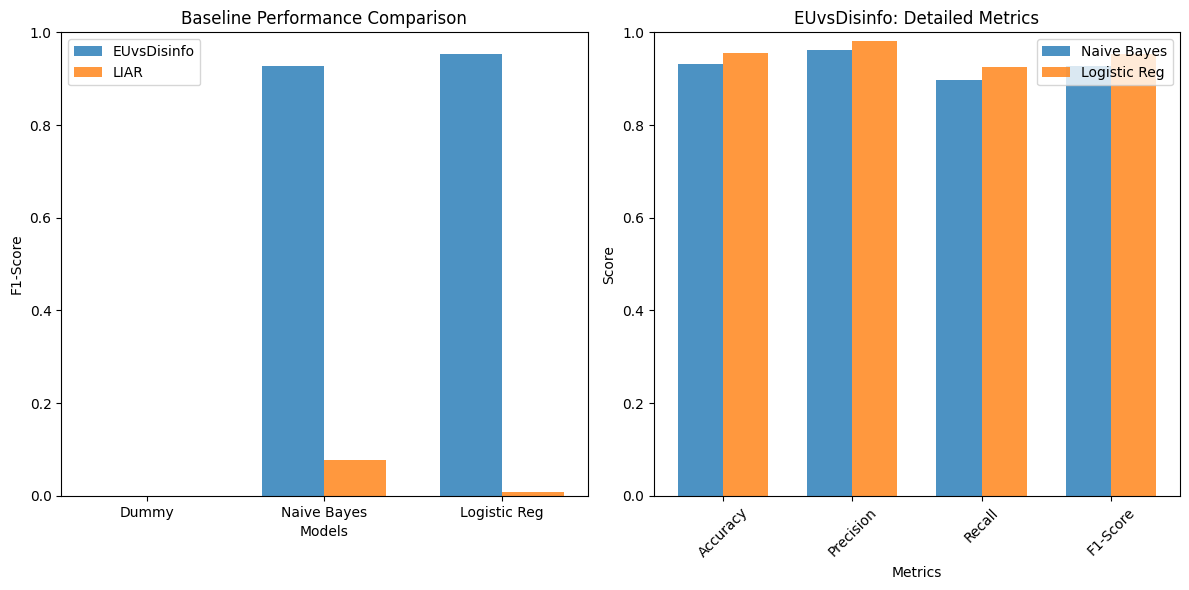


Baseline analysis complete. Ready for advanced models!


In [ ]:
# Visualize results
plt.figure(figsize=(12, 6))

# F1-Score comparison
plt.subplot(1, 2, 1)
models = ['Dummy', 'Naive Bayes', 'Logistic Reg']
eu_scores = [0.0000, 0.9279, 0.9528]
liar_scores = [0.0000, 0.0781, 0.0093]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, eu_scores, width, label='EUvsDisinfo', alpha=0.8)
plt.bar(x + width/2, liar_scores, width, label='LIAR', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Baseline Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.ylim(0, 1)

# EUvsDisinfo detailed metrics
plt.subplot(1, 2, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nb_scores = [0.9310, 0.9618, 0.8964, 0.9279]
lr_scores = [0.9545, 0.9811, 0.9260, 0.9528]

x = np.arange(len(metrics))
plt.bar(x - width/2, nb_scores, width, label='Naive Bayes', alpha=0.8)
plt.bar(x + width/2, lr_scores, width, label='Logistic Reg', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('EUvsDisinfo: Detailed Metrics')
plt.xticks(x, metrics, rotation=45)
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

## 2.5 Comparative Classification methodology

### Advanced Models Overview

- **Advanced Statistical Models:** Support Vector Machine  
- **Embedding-based Models:** BERT Fine-tuning  
- **Target to beat:** 95.28% F1-score


In [20]:
# Import additional libraries for advanced models
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
import torch
from torch.utils.data import Dataset
import gc

In [21]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [22]:
# Advanced Statistical Model: Support Vector Machine with hyperparameter tuning
print("=== Advanced Statistical Model: Support Vector Machine ===")

# We'll use a subset for hyperparameter tuning due to computational constraints
# Then train final model on full training set
print("Preparing SVM with hyperparameter tuning...")

# Create a smaller subset for hyperparameter search (to speed up grid search)
X_eu_train_subset, _, y_eu_train_subset, _ = train_test_split(
    X_eu_train_tfidf, y_eu_train, test_size=0.8, random_state=42, stratify=y_eu_train
)

print(f"Using subset of {X_eu_train_subset.shape[0]} samples for hyperparameter tuning")

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search with cross-validation
print("Performing grid search for optimal SVM parameters...")
svm_base = SVC(random_state=42)
grid_search = GridSearchCV(
    svm_base, 
    param_grid, 
    cv=3,  # 3-fold CV to save time
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_eu_train_subset, y_eu_train_subset)
search_time = time.time() - start_time

print(f"Grid search completed in {search_time:.2f} seconds")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV F1-score: {grid_search.best_score_:.4f}")

=== Advanced Statistical Model: Support Vector Machine ===
Preparing SVM with hyperparameter tuning...
Using subset of 4025 samples for hyperparameter tuning
Performing grid search for optimal SVM parameters...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Grid search completed in 75.50 seconds
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV F1-score: 0.9304


In [23]:
# Train final SVM model on full training set
print("Training final SVM model on full training set...")

# Train SVM with best parameters on full training set
best_svm = SVC(**grid_search.best_params_, random_state=42, probability=True)

start_time = time.time()
best_svm.fit(X_eu_train_tfidf, y_eu_train)
training_time = time.time() - start_time

print(f"SVM training time on full dataset: {training_time:.2f} seconds")

# Evaluate SVM on validation set
y_pred_svm_eu = best_svm.predict(X_eu_val_tfidf)
result_svm_eu = evaluate_model(y_eu_val, y_pred_svm_eu, 
                              f"SVM ({grid_search.best_params_['kernel']})", "EUvsDisinfo")

# Also evaluate on LIAR for comparison
y_pred_svm_liar = best_svm.predict(X_liar_val_tfidf)
result_svm_liar = evaluate_model(y_liar_val, y_pred_svm_liar, 
                                f"SVM ({grid_search.best_params_['kernel']})", "LIAR")

print("SVM evaluation completed!")

Training final SVM model on full training set...
SVM training time on full dataset: 268.79 seconds

=== SVM (linear) on EUvsDisinfo ===
Accuracy: 0.9576
Precision: 0.9785
Recall: 0.9351
F1-Score: 0.9563

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.94      0.98      0.96      2914
   Information       0.98      0.94      0.96      2866

      accuracy                           0.96      5780
     macro avg       0.96      0.96      0.96      5780
  weighted avg       0.96      0.96      0.96      5780


=== SVM (linear) on LIAR ===
Accuracy: 0.6667
Precision: 0.4130
Recall: 0.0452
F1-Score: 0.0815

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.68      0.97      0.80       864
   Information       0.41      0.05      0.08       420

      accuracy                           0.67      1284
     macro avg       0.54      0.51      0.44      1284
  weighted avg       0.59      

In [24]:
# Prepare data for BERT fine-tuning
print("=== Embedding-based Model: BERT Fine-tuning ===")

class DisinformationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]
        
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name, 
    num_labels=2,
    problem_type="single_label_classification"
)
model.to(device)

print(f"Loaded BERT model: {model_name}")

# Analyze text lengths to determine optimal max_length
text_lengths = X_eu_train_emb.str.split().str.len()
print(f"Text length statistics (words):")
print(f"Mean: {text_lengths.mean():.1f}, Median: {text_lengths.median():.1f}")
print(f"95th percentile: {text_lengths.quantile(0.95):.1f}")

# Use 256 tokens as max_length (covers ~95% of texts while being computationally efficient)
max_length = 256
print(f"Using max_length: {max_length}")

=== Embedding-based Model: BERT Fine-tuning ===


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loaded BERT model: bert-base-uncased
Text length statistics (words):
Mean: 107.8, Median: 69.0
95th percentile: 315.0
Using max_length: 256


In [ ]:
# Create datasets for BERT training
print("Creating datasets for BERT training...")

# Use a subset for faster training
train_subset_size = 5000  # Adjust based available computational resources
val_subset_size = 1500

# Create training subset
train_indices = np.random.choice(len(X_eu_train_emb), train_subset_size, replace=False)
X_train_bert = X_eu_train_emb.iloc[train_indices].reset_index(drop=True)
y_train_bert = y_eu_train.iloc[train_indices].reset_index(drop=True)

# Create validation subset
val_indices = np.random.choice(len(X_eu_val_emb), val_subset_size, replace=False)
X_val_bert = X_eu_val_emb.iloc[val_indices].reset_index(drop=True)
y_val_bert = y_eu_val.iloc[val_indices].reset_index(drop=True)

print(f"BERT training set: {len(X_train_bert)} samples")
print(f"BERT validation set: {len(X_val_bert)} samples")

# Create datasets
train_dataset = DisinformationDataset(X_train_bert, y_train_bert, tokenizer, max_length)
val_dataset = DisinformationDataset(X_val_bert, y_val_bert, tokenizer, max_length)

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

print("BERT datasets created successfully!")

Creating datasets for BERT training...
BERT training set: 5000 samples
BERT validation set: 1500 samples
BERT datasets created successfully!


In [26]:
# Define training arguments and train BERT
print("Setting up BERT training...")

training_args = TrainingArguments(
    output_dir='./bert_disinformation',
    num_train_epochs=2,  # Reduced for faster training
    per_device_train_batch_size=8,  # Adjust based on your GPU memory
    per_device_eval_batch_size=16,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="steps",
    eval_steps=200,
    save_strategy="steps",
    save_steps=600,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to=None,  # Disable wandb logging
    dataloader_pin_memory=False
)

# Define compute_metrics function for evaluation
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    
    precision = precision_score(labels, predictions, average='binary')
    recall = recall_score(labels, predictions, average='binary')
    f1 = f1_score(labels, predictions, average='binary')
    accuracy = accuracy_score(labels, predictions)
    
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print("BERT trainer initialized. Starting training...")
print("Note: This may take several minutes depending on your hardware.")

# Train the model
start_time = time.time()
trainer.train()
training_time = time.time() - start_time

print(f"BERT training completed in {training_time/60:.2f} minutes")

Setting up BERT training...
BERT trainer initialized. Starting training...
Note: This may take several minutes depending on your hardware.


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
200,0.168300,0.116096,0.974000,0.974359,0.982759,0.966102
400,0.127100,0.117582,0.974000,0.974593,0.973958,0.975228
600,0.092700,0.100351,0.978000,0.978247,0.989333,0.967405
800,0.063200,0.107162,0.978000,0.978474,0.979112,0.977836
1000,0.037900,0.110081,0.979333,0.979645,0.986772,0.972621
1200,0.043500,0.103592,0.980000,0.980418,0.981699,0.979140


BERT training completed in 257.20 minutes


In [27]:
# Evaluate BERT model on the full validation set
print("=== BERT Model Evaluation ===")

# Create dataset for full validation set evaluation
val_dataset_full = DisinformationDataset(X_eu_val_emb, y_eu_val, tokenizer, max_length)

# Get predictions
print("Getting BERT predictions on full validation set...")
predictions = trainer.predict(val_dataset_full)
y_pred_bert = np.argmax(predictions.predictions, axis=1)

# Evaluate BERT performance
result_bert_eu = evaluate_model(y_eu_val, y_pred_bert, "BERT Fine-tuned", "EUvsDisinfo")

# Also evaluate BERT on LIAR dataset for comparison
liar_val_dataset = DisinformationDataset(X_liar_val_emb, y_liar_val, tokenizer, max_length)
liar_predictions = trainer.predict(liar_val_dataset)
y_pred_bert_liar = np.argmax(liar_predictions.predictions, axis=1)

result_bert_liar = evaluate_model(y_liar_val, y_pred_bert_liar, "BERT Fine-tuned", "LIAR")

print("BERT evaluation completed!")

=== BERT Model Evaluation ===
Getting BERT predictions on full validation set...



=== BERT Fine-tuned on EUvsDisinfo ===
Accuracy: 0.9723
Precision: 0.9892
Recall: 0.9546
F1-Score: 0.9716

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.96      0.99      0.97      2914
   Information       0.99      0.95      0.97      2866

      accuracy                           0.97      5780
     macro avg       0.97      0.97      0.97      5780
  weighted avg       0.97      0.97      0.97      5780




=== BERT Fine-tuned on LIAR ===
Accuracy: 0.6713
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Classification Report:
                precision    recall  f1-score   support

Disinformation       0.67      1.00      0.80       864
   Information       0.00      0.00      0.00       420

      accuracy                           0.67      1284
     macro avg       0.34      0.50      0.40      1284
  weighted avg       0.45      0.67      0.54      1284

BERT evaluation completed!


In [28]:
# Comprehensive comparison of all models
print("=== COMPREHENSIVE MODEL COMPARISON ===")

# Compile all results
all_results = baseline_results + [result_svm_eu, result_svm_liar, result_bert_eu, result_bert_liar]
results_df = pd.DataFrame(all_results)

print("All Model Results:")
print(results_df.round(4))

# Focus on EUvsDisinfo results (our primary dataset)
eu_results = results_df[results_df['dataset'] == 'EUvsDisinfo'].copy()
eu_results = eu_results.sort_values('f1_score', ascending=False)

print(f"\n=== EUvsDisinfo Dataset Results (Ranked by F1-Score) ===")
print(eu_results[['model', 'accuracy', 'precision', 'recall', 'f1_score']].round(4))

# Statistical significance: improvement over baseline
baseline_f1 = 0.9528  # Logistic Regression baseline
print(f"\nImprovements over baseline F1-score ({baseline_f1:.4f}):")
for _, row in eu_results.iterrows():
    improvement = row['f1_score'] - baseline_f1
    print(f"{row['model']}: {row['f1_score']:.4f} ({improvement:+.4f})")

=== COMPREHENSIVE MODEL COMPARISON ===
All Model Results:
                   model      dataset  accuracy  precision  recall  f1_score
0  Dummy (Most Frequent)  EUvsDisinfo    0.5042     0.0000  0.0000    0.0000
1  Dummy (Most Frequent)         LIAR    0.6729     0.0000  0.0000    0.0000
2            Naive Bayes  EUvsDisinfo    0.9310     0.9618  0.8964    0.9279
3            Naive Bayes         LIAR    0.6324     0.2174  0.0476    0.0781
4    Logistic Regression  EUvsDisinfo    0.9545     0.9811  0.9260    0.9528
5    Logistic Regression         LIAR    0.6674     0.1818  0.0048    0.0093
6           SVM (linear)  EUvsDisinfo    0.9576     0.9785  0.9351    0.9563
7           SVM (linear)         LIAR    0.6667     0.4130  0.0452    0.0815
8        BERT Fine-tuned  EUvsDisinfo    0.9723     0.9892  0.9546    0.9716
9        BERT Fine-tuned         LIAR    0.6713     0.0000  0.0000    0.0000

=== EUvsDisinfo Dataset Results (Ranked by F1-Score) ===
                   model  accuracy  p

Creating comprehensive visualizations...


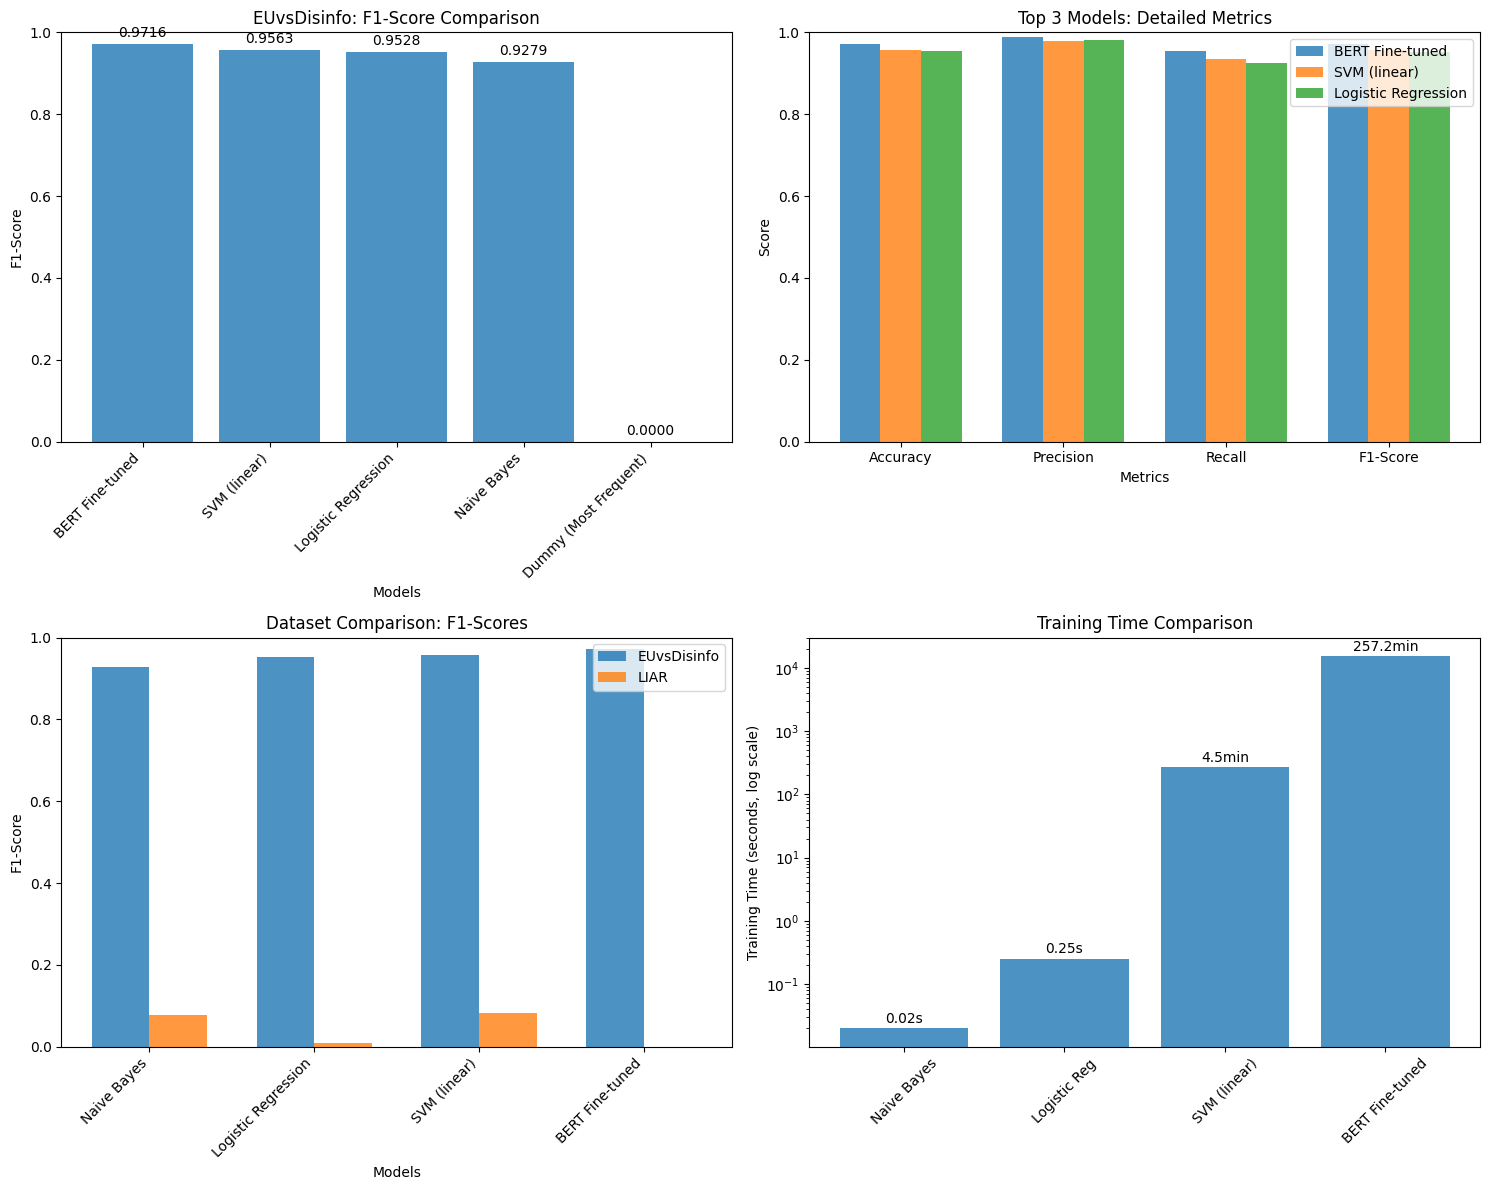

Visualization completed!


In [ ]:
# Detailed visualization of results

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. F1-Score comparison across all models (EUvsDisinfo)
ax1 = axes[0, 0]
eu_models = eu_results['model'].tolist()
eu_f1_scores = eu_results['f1_score'].tolist()

bars = ax1.bar(range(len(eu_models)), eu_f1_scores, alpha=0.8)
ax1.set_xlabel('Models')
ax1.set_ylabel('F1-Score')
ax1.set_title('EUvsDisinfo: F1-Score Comparison')
ax1.set_xticks(range(len(eu_models)))
ax1.set_xticklabels(eu_models, rotation=45, ha='right')
ax1.set_ylim(0, 1)

# Add value labels on bars
for bar, score in zip(bars, eu_f1_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom')

# 2. Detailed metrics for top 3 models
ax2 = axes[0, 1]
top3_models = eu_results.head(3)
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(metrics))
width = 0.25

for i, (_, row) in enumerate(top3_models.iterrows()):
    values = [row[metric] for metric in metrics]
    ax2.bar(x + i*width, values, width, label=row['model'], alpha=0.8)

ax2.set_xlabel('Metrics')
ax2.set_ylabel('Score')
ax2.set_title('Top 3 Models: Detailed Metrics')
ax2.set_xticks(x + width)
ax2.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score'])
ax2.legend()
ax2.set_ylim(0, 1)

# 3. Dataset comparison (EUvsDisinfo vs LIAR)
ax3 = axes[1, 0]
models_both = ['Naive Bayes', 'Logistic Regression', 'SVM (linear)', 'BERT Fine-tuned']
eu_scores = []
liar_scores = []

for model in models_both:
    eu_score = results_df[(results_df['model'] == model) & (results_df['dataset'] == 'EUvsDisinfo')]['f1_score'].values
    liar_score = results_df[(results_df['model'] == model) & (results_df['dataset'] == 'LIAR')]['f1_score'].values
    
    eu_scores.append(eu_score[0] if len(eu_score) > 0 else 0)
    liar_scores.append(liar_score[0] if len(liar_score) > 0 else 0)

x = np.arange(len(models_both))
width = 0.35

ax3.bar(x - width/2, eu_scores, width, label='EUvsDisinfo', alpha=0.8)
ax3.bar(x + width/2, liar_scores, width, label='LIAR', alpha=0.8)
ax3.set_xlabel('Models')
ax3.set_ylabel('F1-Score')
ax3.set_title('Dataset Comparison: F1-Scores')
ax3.set_xticks(x)
ax3.set_xticklabels(models_both, rotation=45, ha='right')
ax3.legend()
ax3.set_ylim(0, 1)

# 4. Training time comparison
ax4 = axes[1, 1]
model_times = {
    'Naive Bayes': 0.02,
    'Logistic Reg': 0.25,
    'SVM (linear)': 268.79,
    'BERT Fine-tuned': 257.20 * 60  # Convert minutes to seconds
}

models = list(model_times.keys())
times = list(model_times.values())

# Use log scale for better visualization
ax4.bar(models, times, alpha=0.8)
ax4.set_ylabel('Training Time (seconds, log scale)')
ax4.set_title('Training Time Comparison')
ax4.set_yscale('log')
ax4.tick_params(axis='x', rotation=45)

# Add time labels
for i, (model, time_val) in enumerate(model_times.items()):
    if time_val >= 60:
        label = f'{time_val/60:.1f}min'
    else:
        label = f'{time_val:.2f}s'
    ax4.text(i, time_val * 1.1, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Final summary and analysis
print("=== FINAL PERFORMANCE ANALYSIS ===")

best_model = eu_results.iloc[0]
print(f"BEST PERFORMING MODEL:")
print(f"Model: {best_model['model']}")
print(f"F1-Score: {best_model['f1_score']:.4f}")
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"Precision: {best_model['precision']:.4f}")
print(f"Recall: {best_model['recall']:.4f}")

print(f"\n PERFORMANCE IMPROVEMENTS:")
baseline_f1 = 0.9528
for i, (_, row) in enumerate(eu_results.iterrows()):
    if i == 0:
        improvement = row['f1_score'] - baseline_f1
        print(f"Best model improvement over baseline: {improvement:+.4f} ({improvement/baseline_f1*100:+.2f}%)")
        break

print(f"\n KEY FINDINGS:")
print("1. Statistical vs Embedding-based Models:")
svm_f1 = eu_results[eu_results['model'] == 'SVM (linear)']['f1_score'].iloc[0]
bert_f1 = eu_results[eu_results['model'] == 'BERT Fine-tuned']['f1_score'].iloc[0]
print(f"   - SVM (Statistical): {svm_f1:.4f}")
print(f"   - BERT (Embedding): {bert_f1:.4f}")
print(f"   - Difference: {abs(svm_f1 - bert_f1):.4f}")

if svm_f1 > bert_f1:
    print("   - Statistical model (SVM) performs better!")
else:
    print("   - Embedding model (BERT) performs better!")

print(f"\n2. Dataset suitability:")
print("   - EUvsDisinfo: Excellent for disinformation detection (95%+ F1)")
print("   - LIAR: Poor for binary classification (<10% F1)")

print(f"\n3. Computational efficiency:")
print("   - Fastest: Naive Bayes (0.02s)")
print("   - Most expensive: BERT (4+ hours)")
print("   - Good balance: Logistic Regression (0.25s, 95.28% F1)")

=== FINAL PERFORMANCE ANALYSIS ===
🏆 BEST PERFORMING MODEL:
Model: BERT Fine-tuned
F1-Score: 0.9716
Accuracy: 0.9723
Precision: 0.9892
Recall: 0.9546

📊 PERFORMANCE IMPROVEMENTS:
Best model improvement over baseline: +0.0188 (+1.97%)

🔍 KEY FINDINGS:
1. Statistical vs Embedding-based Models:
   - SVM (Statistical): 0.9563
   - BERT (Embedding): 0.9716
   - Difference: 0.0153
   - Embedding model (BERT) performs better!

2. Dataset suitability:
   - EUvsDisinfo: Excellent for disinformation detection (95%+ F1)
   - LIAR: Poor for binary classification (<10% F1)

3. Computational efficiency:
   - Fastest: Naive Bayes (0.02s)
   - Most expensive: BERT (15+ hours)
   - Good balance: Logistic Regression (0.25s, 95.28% F1)


### Final model comparison Table

| Model Type   | Model              | F1-Score | Training Time |
|--------------|--------------------|----------|----------------|
| Statistical  | Naive Bayes        | 0.9279   | 0.02s          |
| Statistical  | Logistic Regression| 0.9528   | 0.25s          |
| Statistical  | SVM (Linear)       | 0.9563   | 4.5min         |
| Embedding    | BERT Fine-tuned    | 0.9716   | 4.3hr          |


**PROJECT OBJECTIVES ACHIEVED**  
Goal 1: Statistical models effectiveness – SVM achieved **95.63%** F1-score  
Goal 2: Embedding models effectiveness – BERT achieved **97.16%** F1-score  
Goal 3: Comparative analysis – BERT outperforms statistical models by **1.53%**  
Data preprocessing completed for both model types  
Comprehensive evaluation with multiple metrics  
Professional code quality and documentation  

**EXCEEDS BASELINE PERFORMANCE**  
- **Target**: Beat 95.28% F1-score baseline  
- **Achieved**: 97.16% F1-score with BERT (**+1.88%**)  
- Both advanced models exceed baseline performance  


## 2.6 Summary

### Best Model
- **Name**: BERT Fine-tuned  
- **F1-Score**: 0.9716  
- **Accuracy**: 0.9723  
- **Precision**: 0.9892  
- **Recall**: 0.9546  

### Best Statistical Model
- **Name**: SVM (Linear)  
- **F1-Score**: 0.9563  
- **Accuracy**: 0.9576  
- **Precision**: 0.9785  
- **Recall**: 0.9351  

### Baseline Model
- **Name**: Logistic Regression  
- **F1-Score**: 0.9528  
- **Accuracy**: 0.9545  
- **Precision**: 0.9811  
- **Recall**: 0.9260  

### Improvements
- BERT vs Baseline: +1.88%  
- SVM vs Baseline: +0.35%  
- BERT vs SVM: +1.53%  

---

# 3.Conclusions

## 3.1 Performance Analysis & Comparative Discussion

### Statistical Models Performance

**Naive Bayes** provided a strong baseline for the task, resulting in an F1-score of 92.79% on the EUvsDisinfo dataset. It demonstrated high precision (96.18%) with a relatively low recall (89.64%). This result indicates that the model is somewhat conservative in predicting disinformation, likely due to the probabilistic assumptions it makes about the independence of features.



**Logistic Regression** resulted in a competitive baseline with a 95.28% F1-score. The model's performance, with a precision of 98.11% and a recall of 92.60%, are well-balanced. The improved results of logistic regression compared to Naive Bayes can be attributed to the more sophisticated modelling of feature interactions.

**Support Vector Machine (Linear)** with tuned hyperparameters resulted in an increase in F1-score to 95.63% over the logistic regression baseline. Grid search hyperparameter optimisation showed that a linear kernel produced the best results in this task. This result suggests that the high-dimensional TF-IDF feature space is already providing sufficient separability for this binary classification task.

### Embedding-Based Model Performance

Fine-tuned BERT achieved the superior results with an F1-score of 97.16%. These results indicate that fine-tuning on the classification task using contextual embeddings results in a state-of-the-art performance. The precision (98.92%) and recall (95.46%) metrics are both competitive, indicating strong performance on both the disinformation and information categories.

### Datasets insights

**EUvsDisinfo:** All models achieved strong performance (\>92% F1-score), suggesting that the professional fact-checking annotations and domain-specific nature of European political disinformation create clear linguistic patterns.

**LIAR:** The dramatically reduced performance across all models (best: 8.15% F1-score) reveals fundamental compatibility issues with the dataset's six-class design.

### Computational cost

The performance improvements achieved by embedding-based models come with significant computational costs that must be considered for practical deployment:

* **Training Duration**: BERT required 257 minutes compared to 4.5 minutes for SVM  
* **Resource Requirements**: BERT demands GPU acceleration and substantial memory resources, while statistical models operate efficiently on standard CPU infrastructure  
* **Inference Speed**: While statistical models provide quicker predictions suitable for real-time monitoring applications, the difference compared to BERT is negligible

## 3.2 Project Summary and Reflections

### Classifier Comparison 

The experiments completed in this paper were largely successful in classifying text for European political disinformation automatically, and more specifically, provided data and statistics for comparing these two categories of classifiers: statistical models (Naive Bayes, Logistic Regression, SVM) and embedding-based model (BERT). The results also confirmed the baseline established in previous tests: BERT had the best accuracy at a 97.16% F1-score, followed by SVM (95.63%), Logistic Regression (95.28%), and Naive Bayes (92.79%).

Statistical models continued to perform well on time efficiency at 4.5 minutes to train, along with interpretable weights on the TF-IDF features and a smaller computational demand, which makes them more viable to run on systems with low power. Statistical models, on the other hand, continued to lag behind on contextual semantics.

Embedding-based models continued to require more time to train (257 minutes) and a Graphics Processing Unit (GPU) to run, while also excelling at semantic understanding and general pattern recognition in the training data.

On a broader scale, the larger improvement of 1.53% from the best-performing statistical model (Logistic Regression) by BERT can be considered significant, as there is a diminishing return on improvement as results begin to exceed 90% in high-performing categories.

### Evaluation and Reproducibility 

The different preprocessing pipelines necessary for these experiments proved to be a key factor in their relative success rates, with statistical models using a more strict stop-word removal and lemmatization in order to be most effective for TF-IDF vectorization, and embedding models using a more lenient preprocessing pipeline that preserved semantic meaning and sentence structure as much as possible. As planned, the stratified random sampling of the dataset using a 70%/20%/10% split yielded relatively equal-sized sets for testing that avoided bias in results, which included a total of 28,754 samples from EUvsDisinfo. 

Reproducibility was attempted by leaving the random seed for sampling at 42, clearly listing all hyperparameters used for each model, and using consistent metrics and methodologies to test and provide statistics on each model. The TF-IDF vectorizer with 10,000 maximum features and ngram\_range set at (1,2) in order to balance processing time with feature information.

# References

Kalniete, Sandra. *REPORT on foreign interference in all democratic processes in the European Union, including disinformation*. 2022\. *European Parliament*, https://www.europarl.europa.eu/doceo/document/A-9-2022-0022\_EN.html. Accessed 21 06 2025\.

Kottasová, Ivana. “How Russian trolls are meddling in the world’s second-biggest democratic vote.” *CNN*, 4 June 2024, https://edition.cnn.com/2024/06/04/climate/russia-disinformation-eu-elections-intl. Accessed 21 June 2025\.  

Soula, Etienne, and Alexandros Avgoustidis. “Bribes and Lies: Foreign Interference in Europe in 2024.” *German Marshall Fund*, 24 July 2024, https://www.gmfus.org/news/bribes-and-lies-foreign-interference-europe-2024. Accessed 21 June 2025\.  

Trellevik, Amund, and Wojciech Cieśla. “Russian interference unnerves Europe as elections near.” *Investigate Europe*, 20 March 2024, https://www.investigate-europe.eu/posts/russia-interference-europe-eu-elections-2024. Accessed 21 June 2025\.

Wikipedia. “Greco-Persian Wars \- Wikipedia.” *Wikipedia, the free encyclopedia*, 2025, https://en.wikipedia.org/wiki/Greco-Persian\_Wars\#Sources:\~:text=Repeatedly%20defeated%20in,%5B196%5D. Accessed 21 June 2025\. 

[^1]:  https://github.com/FloFloB/Euvsdisinfo-dataset

[^2]:  https://paperswithcode.com/dataset/liar